# Introduction to Pandas in Jupyter Notebook

### Welcome to the wonderful world of Pandas!

Pandas is a powerful and versatile library in Python used for data manipulation and analysis. It provides data structures like DataFrames and Series, which make working with structured data incredibly easy and intuitive.

Basically it is the "Excel of Python". Ofcourse it helps us in tasks like data loading, cleaning, transformation, and feature engineering so there is a bit more to it. 

In [2]:
import pandas as pd
import numpy as np

### Load data into a Dataframe 

In [11]:
titanic_df = pd.read_csv('data/titanic/train.csv')
print(titanic_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


#### Basic Exploration of the Data Frame 

In [ ]:
print(titanic_df.head())
print(titanic_df.info())
print(titanic_df.describe())
print(titanic_df['Survived'].value_counts()) # Target variable distribution
print(titanic_df['Pclass'].value_counts())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

### Data Cleaning and Transformation

Importance of cleaning and dtransforming data for ML models. Give context

In [13]:
print(titanic_df.isnull().sum()) # Identify missing values

# Impute missing Age with the mean
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

# Impute missing Embarked with the mode
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

print(titanic_df.isnull().sum()) # Verify missing values are handled

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


C:\Users\sirpr\AppData\Local\Temp\ipykernel_15720\2920111184.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
C:\Users\sirpr\AppData\Local\Temp\ipykernel_15720\2920111184.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

#### Dropping Unnecessary Columns

In [14]:
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
print(titanic_df.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


In [15]:
titanic_df['Sex'] = titanic_df['Sex'].map({'female': 1, 'male': 0})
embarked_dummies = pd.get_dummies(titanic_df['Embarked'], prefix='Embarked')
titanic_df = pd.concat([titanic_df, embarked_dummies], axis=1)
titanic_df.drop('Embarked', axis=1, inplace=True)
print(titanic_df.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0         0       3    0  22.0      1      0   7.2500       False       False   
1         1       1    1  38.0      1      0  71.2833        True       False   
2         1       3    1  26.0      0      0   7.9250       False       False   
3         1       1    1  35.0      1      0  53.1000       False       False   
4         0       3    0  35.0      0      0   8.0500       False       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


In [16]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
print(titanic_df.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0         0       3    0  22.0      1      0   7.2500       False       False   
1         1       1    1  38.0      1      0  71.2833        True       False   
2         1       3    1  26.0      0      0   7.9250       False       False   
3         1       1    1  35.0      1      0  53.1000       False       False   
4         0       3    0  35.0      0      0   8.0500       False       False   

   Embarked_S  FamilySize  
0        True           2  
1       False           2  
2        True           1  
3        True           2  
4        True           1  


## Data Prep for Scikit-learn

Why Pandas and Scikit-learn

In [17]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
X = titanic_df[features]
y = titanic_df['Survived']
print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())

Features (X):
   Pclass  Sex   Age  SibSp  Parch     Fare  FamilySize  Embarked_C  \
0       3    0  22.0      1      0   7.2500           2       False   
1       1    1  38.0      1      0  71.2833           2        True   
2       3    1  26.0      0      0   7.9250           1       False   
3       1    1  35.0      1      0  53.1000           2       False   
4       3    0  35.0      0      0   8.0500           1       False   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  

Target (y):
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining Features shape:", X_train.shape)
print("Testing Features shape:", X_test.shape)


Training Features shape: (712, 10)
Testing Features shape: (179, 10)


<Axes: >

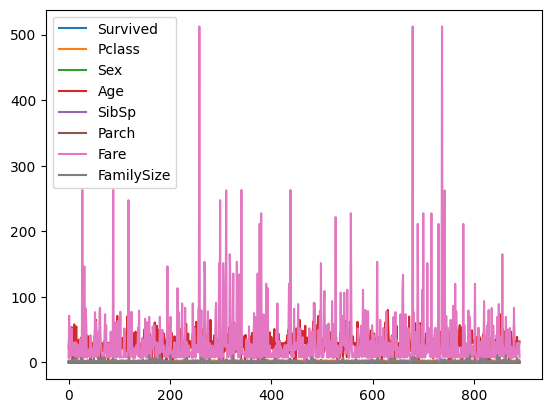

In [20]:
titanic_df.plot()

In [21]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,0,3,0,22.0,1,0,7.2500,False,False,True,2
1,1,1,1,38.0,1,0,71.2833,True,False,False,2
2,1,3,1,26.0,0,0,7.9250,False,False,True,1
3,1,1,1,35.0,1,0,53.1000,False,False,True,2
4,0,3,0,35.0,0,0,8.0500,False,False,True,1


<Axes: >

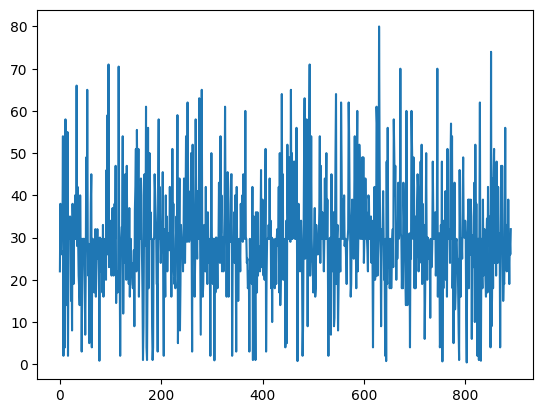

In [26]:
titanic_df["Age"].plot()

<Axes: xlabel='Age', ylabel='Fare'>

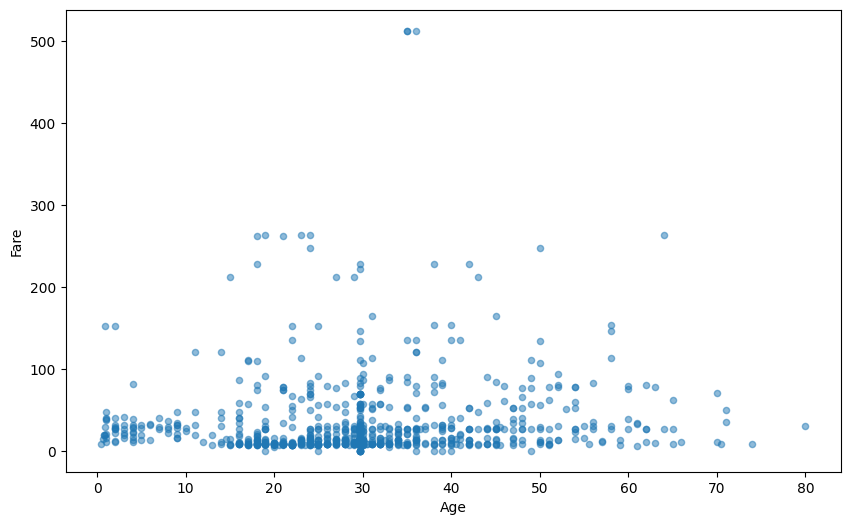

In [28]:
titanic_df.plot.scatter(x='Age', y='Fare', alpha=0.5, figsize=(10, 6))